In [1]:
import random as rd # biblioteca para valores aleatórios
import numpy as np # biblioteca para trabalhar com arrays [vetores de dados] 
import math as math # biblioteca para trabalhar funções matemáticas não nativas
import matplotlib.pyplot as plt # biblioteca para trabalhar com gráficos
import pandas as pd # biblioteca para construir tabelas

In [2]:
# Funções para integração utilizadas
def funcao_identidade(x):
    y = x # Função identidade
    return y

def funcao_seno(x):
    y = math.sin(x) # Função seno
    return y

def funcao_miraculin(x):
    y = (1*math.exp(-1/2))/(8*math.sqrt(2*math.pi))*((x - 105.3/8)**2) # Miraculin
    return y

In [3]:
# Função que determina o valor da integral através do método de média de áreas com números aleatórios
def integral_monte_carlo(a, b, x, n):
    soma = 0
    for i in range(n):
        soma = soma + funcao_seno(x[i])
    return (b-a)/n*(soma)

In [4]:
# Quantidade de amostras de X
n = 10000
# Valor inicial
inicial = 100
# Distancia entre amostras
intervalo = 100
# Vetor nulo que receberá os valores aleatórios de X
x = np.zeros(n)
# Número total de amostras
qnt_amostras = round(n/intervalo)

In [5]:
# Limites de integração da função
a = 0
b = math.pi

In [6]:
result = np.zeros(qnt_amostras) # Inicialização do vetor np zerado que receberá os resultados
axis_x = np.zeros(qnt_amostras) # Inicialização do vetor np zerado que receberá a quantidade de amostras

c = 0

# Aumentar quantidade de amostras a cada execução
for j in range(inicial, n+intervalo, intervalo):
    # Sorteio de variáveis aleatórias
    for i in range(0,j):
        x[i] = round(rd.uniform(a,b),4)
    result[c] = round(integral_monte_carlo(a, b, x, j),4) # Resultado da integral
    axis_x[c] = j # Eixo x para plotagem do gráfico
    c += 1

Text(0, 0.5, 'Valor da Integral')

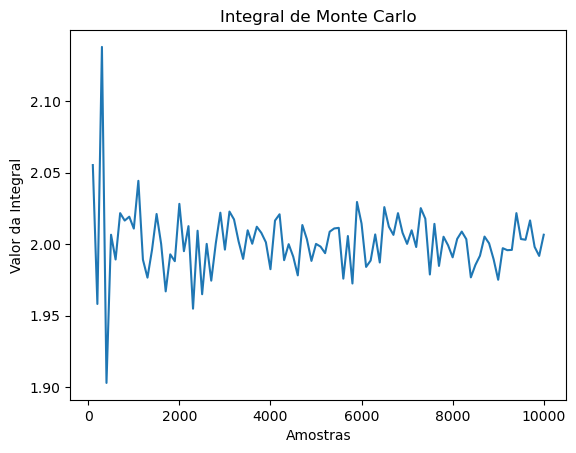

In [7]:
# Gráfico com os resultados da integral, conforme variação de quantidade de amostras
plt.plot(axis_x, result)
plt.title('Integral de Monte Carlo')
plt.xlabel('Amostras')
plt.ylabel('Valor da Integral')

In [8]:
# Determinação do vetor de Erro
valor_real = 2
vetor_erro = np.zeros(len(result))

for i in range (0, len(result)):
    vetor_erro[i] = round(math.sqrt((valor_real - result[i])**2),4)

Text(0, 0.5, 'Erro')

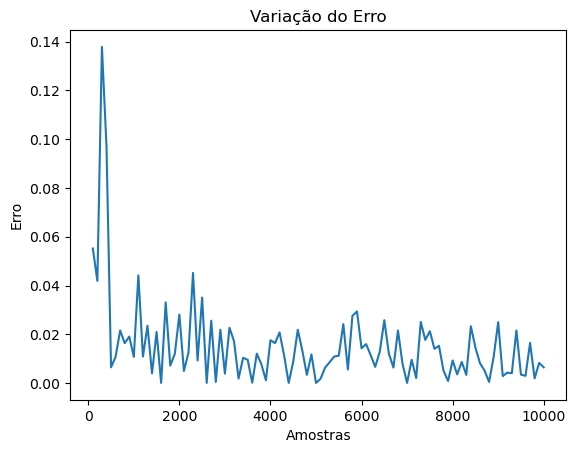

In [9]:
# Gráfico do Erro x Quantidade de amostras
plt.plot(axis_x, vetor_erro)
plt.title('Variação do Erro')
plt.xlabel('Amostras')
plt.ylabel('Erro')

[]

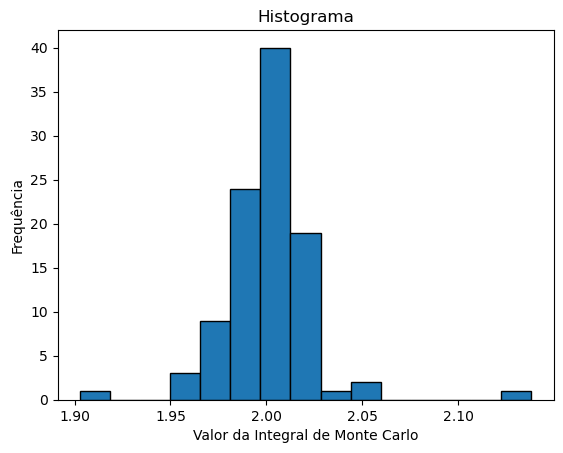

In [10]:
# Histograma com as frequências de valores, mostrando as 15 faixas mais importantes
plt.hist(result, bins = 15, ec = 'black')
plt.title('Histograma')
plt.xlabel('Valor da Integral de Monte Carlo')
plt.ylabel('Frequência')
plt.plot()

In [11]:
# Valor da integral com a maior quantidade de amostras usadas
ult_valor = result[qnt_amostras-1]

print("Valor da integral com número de amostras: ", ult_valor) # Descontando a primeira amostra, que tem índice [0]

Valor da integral com número de amostras:  2.0065


In [12]:
# Cálculo final do erro
erro = (b-a)*math.sqrt((valor_real - ult_valor)**2/n)
print("Erro determinado: ", erro)

Erro determinado:  0.000204203522483335


In [13]:
tabela = pd.DataFrame(data = zip(axis_x, result) ,columns = ['Qnt Amostras','Valor da Integral'])

In [14]:
display(tabela.loc[(tabela['Qnt Amostras']%10000 == 0)])

,Qnt Amostras,Valor da Integral
99,10000.0,2.0065
